In [11]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [7]:
ASSY37WDCB11shank1 = (
(0,0),
(0,40),
(5,80),
(10,120),
(15,160),
(20,200),
(25,240),
(30,280),
(70,20),
(65,60),
(60, 100),
(55, 140),
(50,180),
(45, 220),
(40, 260),
(35,305)
)
shank1_channels = (16,12,8,6,2,3,5,9,15,10,14,13,4,1,7,11)
ASSY37WDCB11shank2 = [(x + 250, y) for (x,y) in ASSY37WDCB11shank1]
shank2_channels = (17,21,22,25,27,29,28,30,18,23,19,20,24,26,31,32)

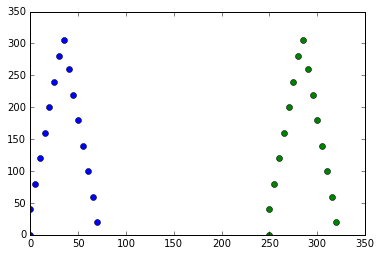

In [13]:
plt.plot([x for (x,y) in ASSY37WDCB11shank1],[y for (x,y) in ASSY37WDCB11shank1],'o')
plt.plot([x for (x,y) in ASSY37WDCB11shank2],[y for (x,y) in ASSY37WDCB11shank2],'o')


In [6]:
#produces pairs of probe site adjacencies from the electrode coordinates in physical space through Delauney tesselation,
#subject to a maximum site spacing (in microns) of max_edgelength. 
import numpy as np
import scipy.spatial as spatial

def adjacency_from_geometry(coords, channels, max_edgelength = 40, correspondence = None):
        
    c = np.array(coords)
    tess = spatial.Delaunay(coords)
    indices, indptr = tess.vertex_neighbor_vertices
    adjs = []
    for k in range(indices.shape[0]-1):
        for j in indptr[indices[k]:indices[k+1]]:
            try:
                if(spatial.distance.euclidean(c[k], c[j]) < max_edgelength):
                    adjs.append((channels[k],channels[j]))
            except:
                pass
    return adjs
    

In [8]:
a1 = adjacency_from_geometry(ASSY37WDCB11shank1, shank1_channels, 50)

In [10]:
a2 = adjacency_from_geometry(ASSY37WDCB11shank2, shank2_channels, 50)

# Process adjacencies to account for the channel mapping between the probe and the intan board.

In [3]:
nexus = ['G', 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 'R', 'R',25, 26, 27, 28, 29, 30, 31, 32, 1, 2, 3, 4, 5, 6, 7, 8]

In [4]:
intan = ['G',23,25,27,29,31,19,17,21,11,15,13,1,3,5,7,9,'R','R',24,26,28,30,32,20,18,22,12,16,14,2,4,6,8,10,'G']

In [5]:
correspond = zip(nexus, intan)

In [57]:
def translate_adjacencies(adjacencies, correspondence=None):
    if correspondence is not None:
        for i,(x,y) in enumerate(adjacencies):
            adjacencies[i] = (translate(x, correspondence), translate(y,correspondence))
    return adjacencies

def translate(val, correspondence):
    return correspondence[[x for (x,y) in correspondence].index(val)][1]

In [69]:
translate_adjacencies(b, cor)

[(5, 23),
 (5, 1),
 (5, 13),
 (1, 23),
 (1, 5),
 (1, 3),
 (1, 11),
 (11, 30),
 (11, 16),
 (11, 3),
 (11, 1),
 (16, 12),
 (16, 6),
 (16, 11),
 (16, 30),
 (6, 12),
 (6, 16),
 (6, 22),
 (6, 7),
 (7, 6),
 (7, 22),
 (7, 15),
 (7, 8),
 (8, 17),
 (8, 9),
 (8, 7),
 (8, 15),
 (9, 10),
 (9, 4),
 (9, 17),
 (9, 8),
 (10, 9),
 (10, 4),
 (10, 19),
 (10, 2),
 (2, 32),
 (2, 10),
 (2, 19),
 (13, 23),
 (13, 5),
 (13, 27),
 (3, 11),
 (3, 1),
 (3, 28),
 (3, 21),
 (3, 30),
 (3, 23),
 (12, 6),
 (12, 16),
 (12, 18),
 (12, 27),
 (12, 30),
 (12, 22),
 (15, 7),
 (15, 8),
 (15, 31),
 (15, 20),
 (15, 17),
 (15, 22),
 (4, 10),
 (4, 9),
 (4, 19),
 (4, 25),
 (4, 26),
 (4, 17),
 (32, 29),
 (32, 24),
 (32, 2),
 (32, 19),
 (29, 32),
 (19, 10),
 (19, 2),
 (19, 32),
 (19, 24),
 (19, 4),
 (19, 25),
 (17, 9),
 (17, 8),
 (17, 20),
 (17, 26),
 (17, 4),
 (17, 15),
 (22, 6),
 (22, 7),
 (22, 31),
 (22, 27),
 (22, 12),
 (22, 15),
 (30, 18),
 (30, 21),
 (30, 11),
 (30, 16),
 (30, 12),
 (30, 3),
 (23, 1),
 (23, 5),
 (23, 13),
 (23

In [2]:
from scipy import spatial
def get_graph_from_geometry(geometry):
    # let's transform the geometry into lists of channel names and coordinates
    chans,coords = zip(*[(ch,xy) for ch,xy in geometry.iteritems()])
    # we'll perform the triangulation and extract the
    try:
        tri = spatial.Delaunay(coords)
    except:
        x,y = zip(*coords)
        coords = list(coords)
        coords.append((max(x)+1,max(y)+1))
        tri = spatial.Delaunay(coords)
    # then build the list of edges from the triangulation
    indices, indptr = tri.vertex_neighbor_vertices
    edges = []
    for k in range(indices.shape[0]-1):
        for j in indptr[indices[k]:indices[k+1]]:
            try:
                edges.append((chans[k],chans[j]))
            except IndexError:
                # ignore dummy site
                pass
    return edges

def build_geometries(channel_groups):
    for gr, group in channel_groups.iteritems():
        group['graph'] = get_graph_from_geometry(group['geometry'])
    return channel_groups

def get_probe_channel_groups(probe):
    if probe.DesignType=='Linear':
        channel_groups = {}
        for shank in range(int(probe.NumShank)):
            channel_groups[shank] = {}
            sites = shank*int(probe.NumSitePerShank) + np.arange(int(probe.NumSitePerShank))
            x_locs = [0.0 for s in sites]
            y_locs = [probe.TrueSiteSpacing * s for s in sites]
            channel_groups[shank]['channels'] = list(sites)
            channel_groups[shank]['geometry'] = {s:(x,y) for s,x,y in zip(sites,x_locs,y_locs)}
    return build_geometries(channel_groups)

from pprint import pformat
def save_probe(channel_groups,name):
    with open(name+'.prb', 'w') as f:
        f.write('channel_groups = ' + pformat(channel_groups))